<a href="https://colab.research.google.com/github/nangira/MchezoPesaLTD/blob/main/Mchezo_Pesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.
A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).
You have two possible approaches (as shown below) given the datasets that will be provided; 
1.  Polynomial Approach
2.  Logistic Approach





In order to work on the above problem, we will do the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
This will be done by carrying out the following steps:

- Performing EDA

- Performing any necessary feature engineering 

- Checking for multicollinearity

- Building the model

- Cross-validate the model

- Compute RMSE

- Create residual plots for your models, and assess their heteroscedasticity 
using Bartlett’s test

- Perform appropriate regressions on the data including your justification

- Challenge our solution by providing insights on how we can make improvements.








**Approach 1:** Polynomial approach

What to train given:

1. Rank of home team

2. Rank of away team

3. Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.


In [ ]:
# Loading required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics



In [ ]:
# Loading dataset
fifa_ranking = pd.read_csv("fifa_ranking.csv")
results = pd.read_csv("results.csv")

### **Exploratory Data Analysis**

In [ ]:
# Viewing the first five entries for both datasets
fifa_ranking.head()
results.head()
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Checking last five entries for both datasets

fifa_ranking.tail()
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Looking at the common variables in the two datasets before merging
results['date'].unique()

# The years run from 1872 to 2019

fifa_ranking['rank_date'].unique()
# The years run from 1993 to 2006

results['country'].value_counts()
# There are 266 unique countries

fifa_ranking['country_full'].value_counts()
# There are 209 unique countries

Sudan                    325
Germany                  286
Burkina Faso             286
Myanmar                  286
Congo                    286
                        ... 
Zaire                     66
Serbia and Montenegro     43
Kosovo                    24
Gibraltar                 22
RCS                        5
Name: country_full, Length: 216, dtype: int64

In [ ]:
# merging the two datasets
# Renaming the columns we'll merge it on i.e date and rank_date in fifa_ranking dataset and country_full(fifa_ranking) and country(results)
fifa_ranking.rename(columns = {'rank_date':'date'}, inplace = True)
fifa_ranking.rename(columns = {'country_full':'country'}, inplace = True)

# Merging the two datasets and naming it 'data'
data = pd.merge(fifa_ranking, results, how = 'inner')

# Viewing first 5 entries of our merged dataset
data.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,Brazil,BRA,0.0000000,55,-5,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False
1,35,Ecuador,ECU,0.0000000,23,30,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False
2,50,Zimbabwe,ZIM,0.0000000,27,4,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,False
3,59,Bolivia,BOL,0.0000000,13,28,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False
4,65,Guinea,GUI,0.0000000,23,-2,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False


In [ ]:
## checking for data types and missing values in the dataset
data.info()
data.describe()

# data consists of numeric and categorical variables
# dataset has 23 columns and 918 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     950 non-null    int64  
 1   country                  950 non-null    object 
 2   country_abrv             950 non-null    object 
 3   total_points             950 non-null    float64
 4   previous_points          950 non-null    int64  
 5   rank_change              950 non-null    int64  
 6   cur_year_avg             950 non-null    float64
 7   cur_year_avg_weighted    950 non-null    float64
 8   last_year_avg            950 non-null    float64
 9   last_year_avg_weighted   950 non-null    float64
 10  two_year_ago_avg         950 non-null    float64
 11  two_year_ago_weighted    950 non-null    float64
 12  three_year_ago_avg       950 non-null    float64
 13  three_year_ago_weighted  950 non-null    float64
 14  confederation            9

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,64.905263,52.182116,474.214737,-0.116842,26.510495,26.510495,25.184116,12.592032,26.657200,7.997221,25.412653,5.082516,1.657895,1.042105
std,48.075168,190.135933,318.043068,4.420952,97.787086,97.787086,99.671465,49.835482,100.257323,30.077366,94.555624,18.911083,1.918743,1.234521
min,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,233.500000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,96.000000,0.000000,662.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,201.000000,1332.160000,1683.000000,30.000000,855.300000,855.300000,1008.940000,504.470000,748.610000,224.580000,640.010000,128.000000,31.000000,12.000000


In [ ]:
# Checking for missing data
data.isna().sum()

# There are no missing values

# Checking for duplicates
data.duplicated

# There are no duplicates


<bound method DataFrame.duplicated of      rank   country country_abrv  total_points  previous_points  rank_change  \
0       8    Brazil          BRA          0.00               55           -5   
1      35   Ecuador          ECU          0.00               23           30   
2      50  Zimbabwe          ZIM          0.00               27            4   
3      59   Bolivia          BOL          0.00               13           28   
4      65    Guinea          GUI          0.00               23           -2   
..    ...       ...          ...           ...              ...          ...   
945    12   England          ENG       1050.84             1040            1   
946    14   Uruguay          URU       1018.41              976            3   
947    22   Iceland          ISL        908.01              930            0   
948    26   Austria          AUT        844.70              841            0   
949    97     India          IND        349.92              354            0   

 

In [ ]:
# Dropping the variables we won't need by their respective indices
data = data.drop(data.iloc[:,6:14],axis = 1)
data = data.drop(['country_abrv'], axis = 1)
data.info()


# We now have 918 entries and 15 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             950 non-null    int64  
 1   country          950 non-null    object 
 2   total_points     950 non-null    float64
 3   previous_points  950 non-null    int64  
 4   rank_change      950 non-null    int64  
 5   confederation    950 non-null    object 
 6   date             950 non-null    object 
 7   home_team        950 non-null    object 
 8   away_team        950 non-null    object 
 9   home_score       950 non-null    int64  
 10  away_score       950 non-null    int64  
 11  tournament       950 non-null    object 
 12  city             950 non-null    object 
 13  neutral          950 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 104.8+ KB


## **Univariate Data Analysis**

### **Numerical Variables**

In [ ]:
# Checking the descriptive statistics for our numeric variables in the dataset
# This shows the count, mean, standard deviation, minimum and maximum values and the quantiles
data.describe()

# The count statistic for each variable confirms that there's no missing data

# The maximum score attained is 31, which is rare
# A quick google search confirms that this happened: https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa
# Realistically, the most a team can score in a match is 5.
# We shall proceed to look at the number of rows that record a home and away score greater than 5

data[data['home_score'] > 5]
# There are rows with home scores greater than 5

data[data['away_score']>5]
# There are rows with home scores greater than 5

# Since this is very rare and might affect our model, we shall drop all entries where the home and away scores are greater than 5
data.drop(data.loc[data['home_score'] > 5].index, inplace=True)
data.drop(data.loc[data['away_score'] > 5].index, inplace=True)

# Now checking what the maximum score was
data.describe()

# Our dataset now has 883 entries

,rank,total_points,previous_points,rank_change,home_score,away_score
count,913.0000000,913.0000000,913.0000000,913.0000000,913.0000000,913.0000000
mean,64.0569551,50.3749836,476.3691128,-0.0832421,1.4501643,0.9989047
std,47.5171834,188.0725372,319.7421635,4.3234968,1.2591692,1.0570352
min,1.0000000,0.0000000,0.0000000,-22.0000000,0.0000000,0.0000000
25%,24.0000000,0.0000000,235.0000000,-2.0000000,0.0000000,0.0000000
50%,55.0000000,0.0000000,490.0000000,0.0000000,1.0000000,1.0000000
75%,96.0000000,0.0000000,665.0000000,1.0000000,2.0000000,2.0000000
max,201.0000000,1332.1600000,1683.0000000,30.0000000,5.0000000,5.0000000


In [ ]:
# Checking for range, quantiles, mode, interquantile range for the numeric variables

# First, we create a list of our numerical variables in the Fifa Ranking dataset
data_numerical = data[['rank', 'total_points','previous_points',
                               'rank_change', 'home_score', 'away_score']]


In [ ]:
# Mode

data_mode = data_numerical.mode()
data_mode

# The mode value for all numerical variables is zero except home score which was mostly 1, previous points which was mostly 40 and rank which was mostly 8

,rank,total_points,previous_points,rank_change,home_score,away_score
0,8,0.0,40.0,0.0,1,0


**Skewness** is a statistical measure of asymmetric distribution of data. A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values. A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values. A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** helps determine if the distribution is heavy-tailed compared to a normal distribution. The kurtosis of a normal distribution is 3. If a given distribution has a kurtosis greater than 3 then it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution. If it's less than 3, it means it tends to produce fewer and less extreme outliers than the normal distribution.

**Range** is an index of variability. When the range is more the group is more variable. The smaller the range the more homogeneous is the group.

The further the **interquartile range** is from 0, the more spread out the data points are.

In [ ]:
# Range
data_range = data_numerical.max() - data_numerical.min()
data_range

# The output shows the respective difference between the maximum and minimu values per variable


rank                200.00
total_points       1268.57
previous_points    1683.00
rank_change          52.00
home_score            5.00
away_score            5.00
dtype: float64

In [ ]:
# Interquantile range for the fifa numeric variables
data_IQR = data_numerical.quantile(.75) - data_numerical.quantile(.25)
data_IQR

rank                70.5
total_points         0.0
previous_points    424.5
rank_change          3.0
home_score           2.0
away_score           2.0
dtype: float64

In [ ]:
# kurtosis and skewness
data_numerical.apply(['kurt', 'skew'])

# Rank has a negative kurtosis
# Most variables except total points and rank change have a kurtosis > 3
# All the variables are positively skewed
# Rank, previous points and home score have a skewness measure of 0 meaning their distributions are symmetrical

,rank,total_points,previous_points,rank_change,home_score,away_score
kurt,-0.301703,31.534920,0.601107,10.562371,0.215051,0.876640
skew,0.698760,5.316125,0.565100,1.373859,0.792610,1.072423


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

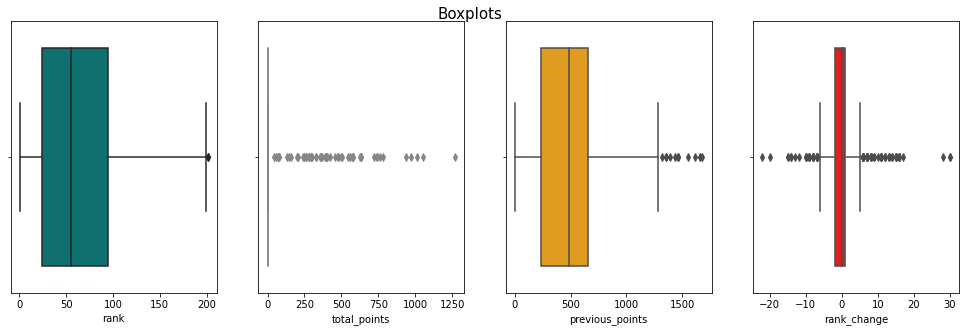

In [ ]:
# Checking for outliers
# We'll use boxplots to visualize each variable and its outliers

# Plotting boxplots to check for outliers

fig, (ax1,ax2,ax3, ax4) = plt.subplots(1,4, figsize=(17,5 ))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
sns.boxplot(data['rank'], ax=ax1, color = "teal")
sns.boxplot(data['total_points'], ax=ax2, color = "pink")
sns.boxplot(data['previous_points'], ax=ax3, color = "orange")
sns.boxplot(data['rank_change'], ax=ax4, color = "red")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


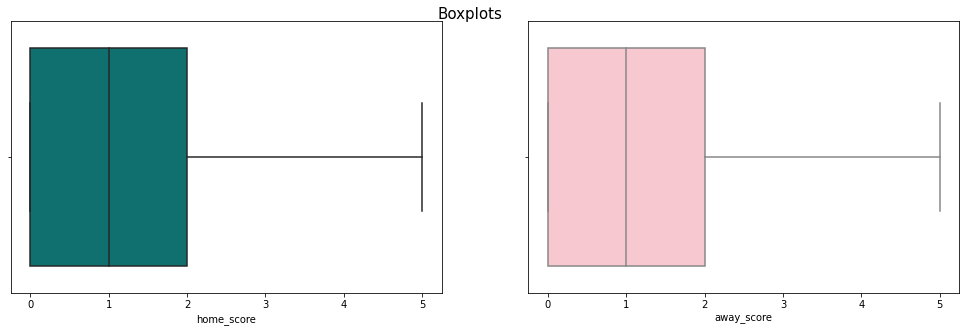

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(17,5 ))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
sns.boxplot(data['home_score'],ax=ax1, color = "teal")
sns.boxplot(data['away_score'],ax=ax2, color = "pink")

Most variables have outliers however it would be best if we retained them as they represent the true situation.

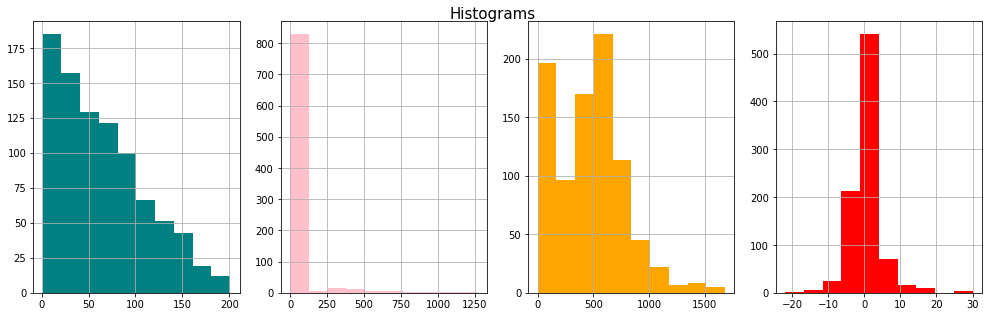

In [ ]:
# Histograms showing the numeric variables distributions 
        
fig, (hist1,hist2, hist3,hist4) = plt.subplots(1,4, figsize=(17, 5))
plt.suptitle('Histograms', fontsize = 15, y = 0.92, color = 'black')
data['rank'].hist(ax=hist1, color = "teal")
data['total_points'].hist(ax=hist2, color = "pink")
data['previous_points'].hist(ax=hist3, color = "orange")
data['rank_change'].hist(ax=hist4, color = "red")


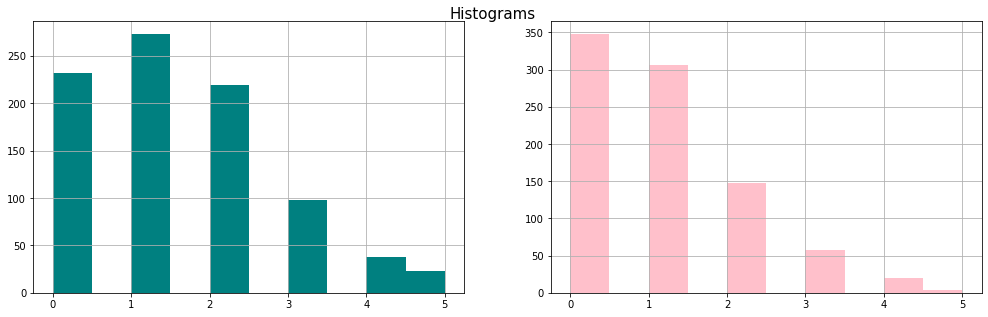

In [ ]:
fig, (hist1,hist2) = plt.subplots(1,2, figsize=(17, 5))
plt.suptitle('Histograms', fontsize = 15, y = 0.92, color = 'black')
data['home_score'].hist(ax=hist1, color = "teal")
data['away_score'].hist(ax=hist2, color = "pink")

From the correlation heatmap we see that there are variables with strong negative correlation eg rank change and away score while the variable with the strongest positive correlation is total points and current year average and weighted current year average.

### **Categorical Variables**

In [ ]:
# Looking at our categorical variables
# Here we get to see the count, unique categories, top category and the frequency and the data type per each categorical variable

data['country'].describe()
# There are 152 countries where the matches were played
# Most of them were in France, 23 times to be exact

data['confederation'].describe()
# There are 6 types of confederations considered
# The top most is UEFA and it has a frequency of 455

data['tournament'].describe()
# There are 35 unique types of tournaments.
# They were mostly Friendly touraments with a frequency of 580

data['city'].describe()
# There are 386 unique cities. 
# Doha was the most frequent city, appearing 14 times

data['home_team'].describe()
# The team that played in their country most times was Estonia, with a frequency of 17 times
# There were 172 times when a team played from their country

data['away_team'].describe()
# The team that played away most times was Uruguay with a frequency of 15
# Different teams played 'away' 178 times

data['neutral'].describe()
# Most games were not played at a neutral venue i.e 767 times

count       883
unique        2
top       False
freq        767
Name: neutral, dtype: object

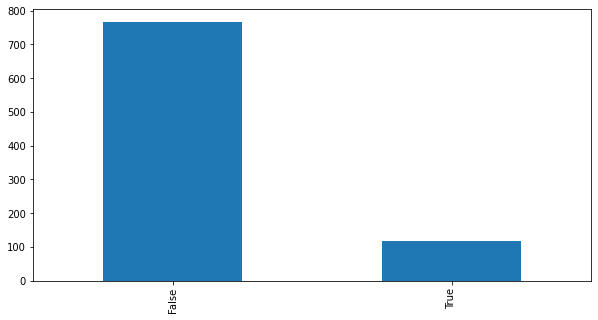

In [ ]:
# Visualizing distribution of neutrality of the game venues
data['neutral'].value_counts().plot(kind='bar',figsize=(10,5))

# Games were mostly played at non-neutral venues

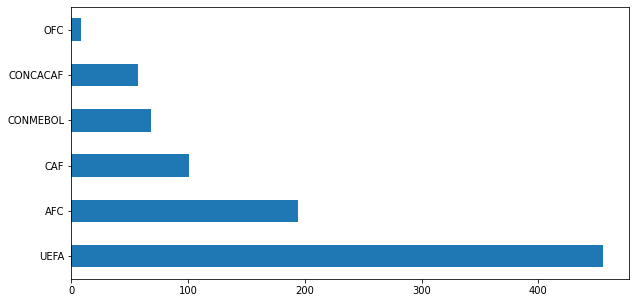

In [ ]:
# Visualizing number of times different confederations featured in a match
data['confederation'].value_counts().plot(kind='barh',figsize=(10,5))

# UEFA was leading and OFC had the least frequency

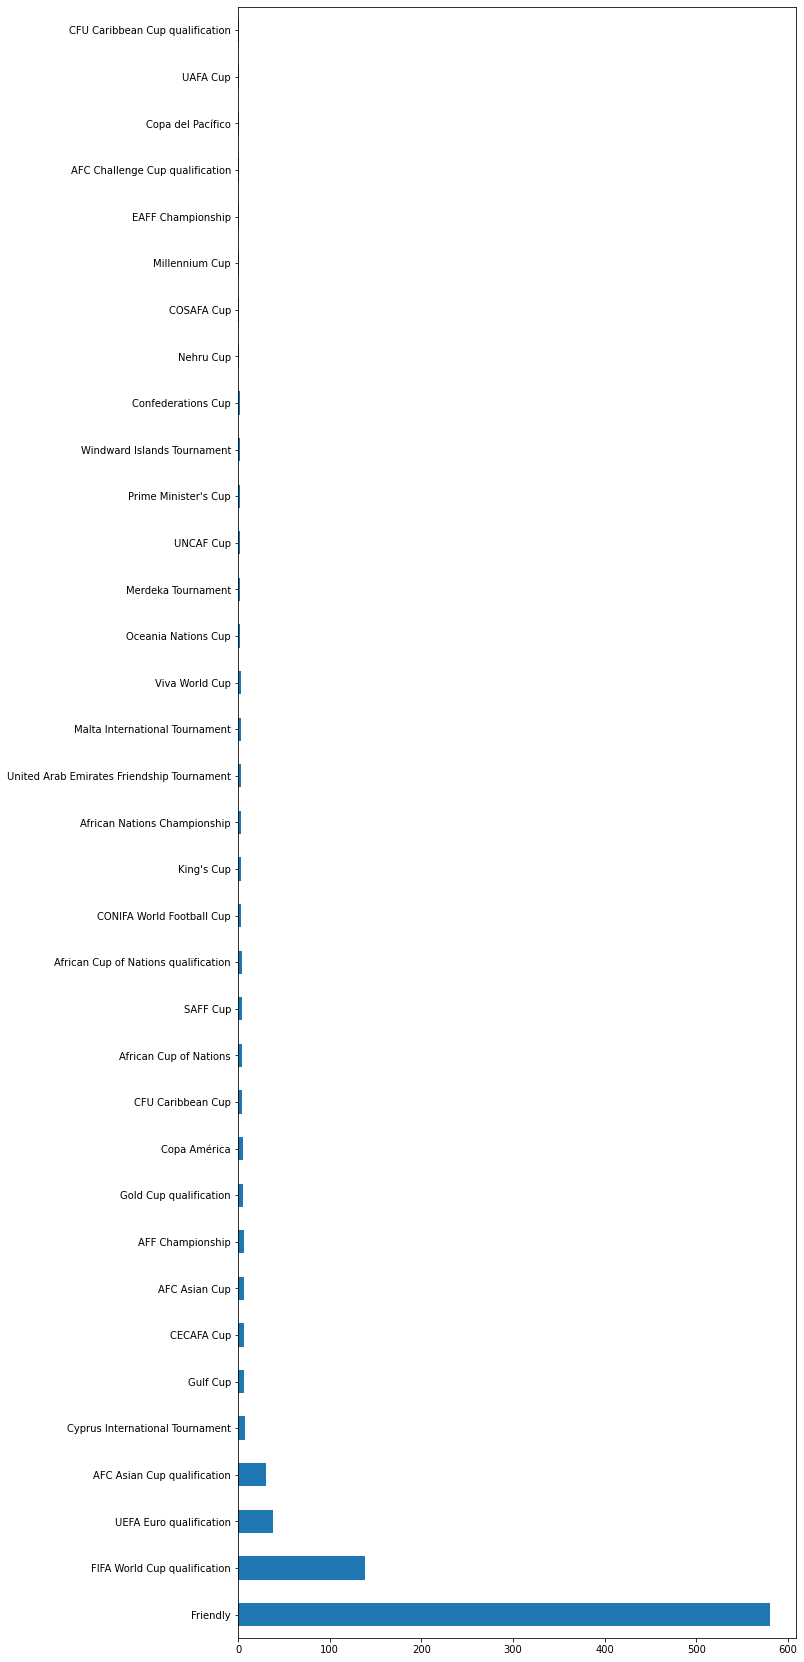

In [ ]:
# Visualizing number of times different tournaments took place
data['tournament'].value_counts().plot(kind='barh',figsize=(10,30))

# Output confirms that majority of the tournaments were Friendly followed by Fifa World Cup qualification. South Pacific Games were the least

## **Bivariate Analysis**

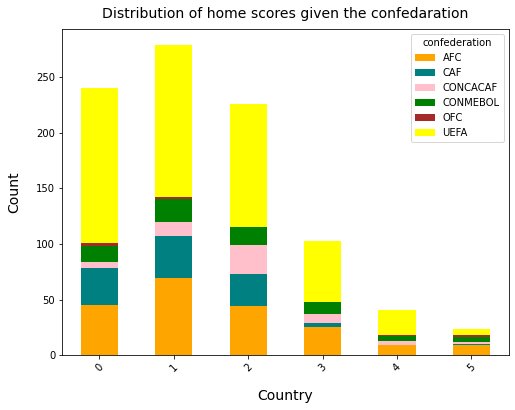

In [ ]:
# Creating the stacked column chart

# First, we'll create a table grouping our data by cell phone access and the countries of our respondents

home_scores = data.groupby(['home_score', 'confederation']).count()
home_scores

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
home_scores_pivot = home_scores.pivot_table(index=['home_score'],columns = ['confederation'],values = 'away_score')
home_scores_pivot

# Plotting our stacked column chart
home_scores_pivot.plot(kind='bar',stacked = True, figsize=(8, 6), color =['orange','teal','pink', 'green','brown','yellow'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Distribution of home scores given the confedaration", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Country", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

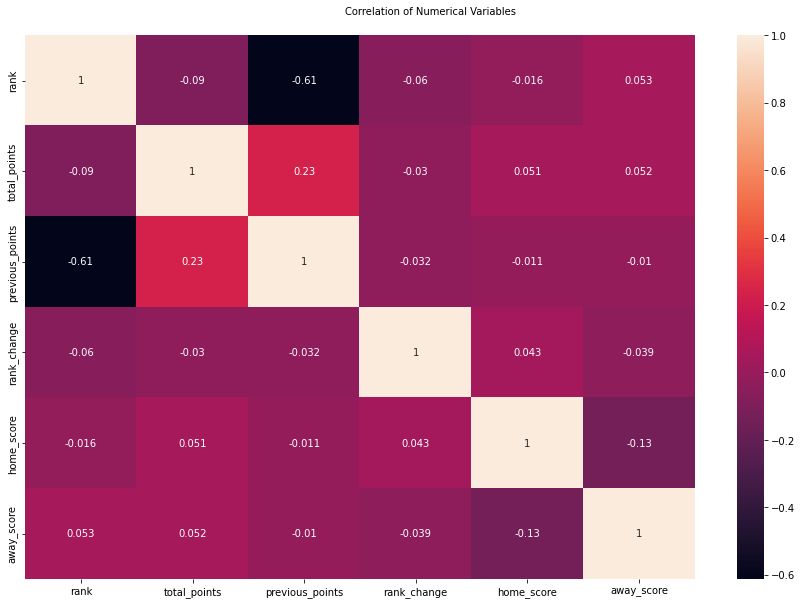

In [ ]:
# Checking the correlation matrix of the numerical variables by visualizing using a heatmap
# A correlation of +1 means there's a strong positive correlation while 0 means there's no correlation.

fig, (data_corr) = plt.subplots( figsize=(15, 10))
plt.suptitle('Correlation of Numerical Variables', fontsize = 10, y = 0.92, color = 'black')
data_corr = sns.heatmap(data_numerical.corr(),annot=True)
plt.show()

In [ ]:
# Encoding our categorical variables
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['neutral'] = en.fit_transform(data['neutral'])
data['confederation'] = en.fit_transform(data['confederation'])
data['tournament'] = en.fit_transform(data['tournament'])
data['country'] = en.fit_transform(data['country'])
data['city'] = en.fit_transform(data['city'])
data['home_team'] = en.fit_transform(data['home_team'])
data['away_team'] = en.fit_transform(data['away_team'])
data

,rank,country,total_points,previous_points,rank_change,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,22,0.00,55,-5,3,1993-08-08,26,106,1,1,18,201,0
1,35,38,0.00,23,30,3,1993-08-08,50,188,5,0,17,291,0
2,50,155,0.00,27,4,1,1993-08-08,188,57,2,0,18,127,0
3,59,19,0.00,13,28,3,1993-08-08,23,185,3,1,17,175,0
4,65,56,0.00,23,-2,1,1993-08-08,71,154,1,0,18,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,12,41,1050.84,1040,1,5,2018-06-07,92,170,4,2,10,65,1
946,14,146,1018.41,976,3,3,2018-06-07,179,186,3,0,18,229,0
947,22,62,908.01,930,0,5,2018-06-07,77,66,2,2,18,297,0
948,26,8,844.70,841,0,5,2018-06-07,156,21,0,0,18,136,1


<ipython-input-27-ba7fb435bb7c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  categorical_variables = data.drop(['rank', 'total_points','previous_points',


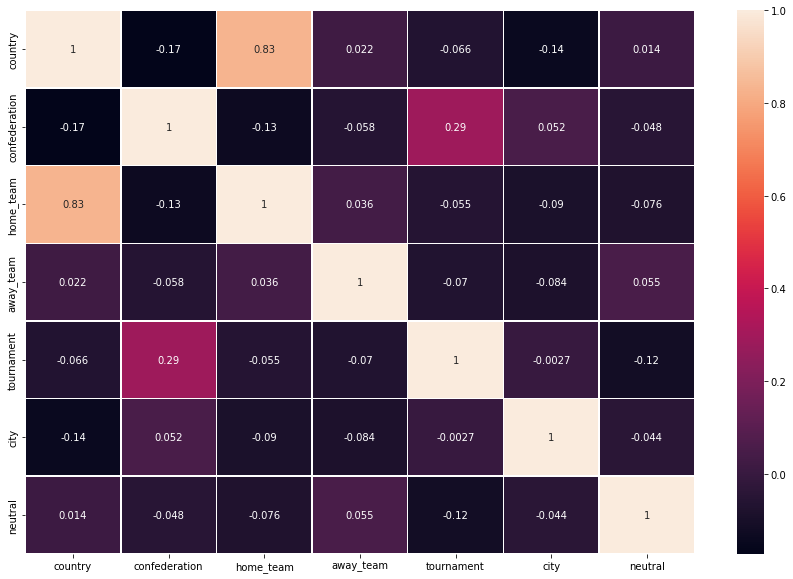

In [ ]:
# Subsetting the data
categorical_variables = data.drop(['rank', 'total_points','previous_points',
                               'rank_change', 'home_score', 'away_score'],1)

# Creating a correlation matrix for our categorical variables
corrMatrix = categorical_variables.corr()
corrMatrix

# Vizualising the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

Country where the game was played had a strong positive correlation (0.86) with the home team variable.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             950 non-null    int64  
 1   country          950 non-null    int64  
 2   total_points     950 non-null    float64
 3   previous_points  950 non-null    int64  
 4   rank_change      950 non-null    int64  
 5   confederation    950 non-null    int64  
 6   date             950 non-null    object 
 7   home_team        950 non-null    int64  
 8   away_team        950 non-null    int64  
 9   home_score       950 non-null    int64  
 10  away_score       950 non-null    int64  
 11  tournament       950 non-null    int64  
 12  city             950 non-null    int64  
 13  neutral          950 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 143.6+ KB


In [ ]:

# Creating copies of the ranking datasets

ranking2 = fifa_ranking.copy()
ranking2.head()
     

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:

# Creating copy of the results dataset

result2 = results.copy()
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#Feature Engineering

In [ ]:
# Creating a new column in the result2 dataset
# This column will contain the perfomance of the home team
# whether win, draw or loss
# The new column is goal_diff i.e. 
# difference in goals between the home and the away teams

result2['goal_diff'] = result2['home_score'] - result2['away_score']
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [ ]:

# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# Applying the function in a new column called Status_home


def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
result2['Status_home'] = result2.goal_diff.apply(lambda j: home_team(j))

result2.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win


In [ ]:
# Changing the tournament type into three categories 
# Tournament type (World cup, Friendly, Other)

def tona(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
      
result2['tournament_type'] = result2.tournament.apply(lambda q: tona(q))
result2.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,Friendly


In [ ]:
# Checking the number of unique values in the tournament column

result2.tournament_type.unique()

array(['Friendly', 'Other', 'World cup'], dtype=object)

In [ ]:
# Changing the dates column in both datasets into datetime format

result2['date'] = pd.to_datetime(result2['date'])
ranking2['rank_date'] = pd.to_datetime(ranking2['rank_date'])

In [ ]:
print(result2.dtypes)
print('\n')
print(ranking2.dtypes)

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                      bool
goal_diff                   int64
Status_home                object
tournament_type            object
year                        int64
month                       int64
dtype: object


rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
thre

In [ ]:

# Extracting the year and month from the date column; 
# Here we will create a new column for each


result2['year'] = pd.DatetimeIndex(result2['date']).year
result2['month'] = pd.DatetimeIndex(result2['date']).month



ranking2['year'] = ranking2['rank_date'].dt.year
ranking2['month'] = ranking2['rank_date'].dt.month
ranking2.head()
     

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [ ]:
result2.head(3)



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,tournament_type,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly,1874,3


In [ ]:

# changing the full country column name in ranking dataset to home_team

ranking2 = ranking2.rename({'country_full': 'home_team'}, axis = 1)
ranking2.head(3)     

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [ ]:
# Dropping unnecessary columns in ranking2 dataset

ranking2.drop(['country_abrv','rank_date', 'total_points', 'cur_year_avg', 'cur_year_avg_weighted' ,'last_year_avg' , 'last_year_avg_weighted' , 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' ,'three_year_ago_weighted', 'confederation'], axis =1, inplace = True)
     result2.head(2)

In [ ]:
# Dropping unnecessary columns in result2 dataset

result2.drop(['date', 'goal_diff'], axis = 1, inplace = True)


In [ ]:
result2.head(3)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,tournament_type,year,month
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,Friendly,1874,3


In [ ]:
ranking2.head(3)

,rank,home_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8
2,3,Switzerland,50,9,1993,8


In [ ]:
# creating copies of the datasets
ranking3 = ranking2.copy()
result3 = result2.copy()

In [ ]:

# MERGING THE DATASETS

# Based on home_team, year, month

home_merged = pd.merge(result2,ranking2, how="left", on = ['home_team', 'year', 'month'])


In [ ]:
home_merged.head()


,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,tournament_type,year,month,rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,Friendly,1874,3,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,Friendly,1875,3,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,Friendly,1876,3,NaN,NaN,NaN


In [ ]:
# renaming the rank column name to home_rank

home_merged = home_merged.rename({'rank': 'home_rank'}, axis = 1)

In [ ]:
home_merged.head(3)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,tournament_type,year,month,home_rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,Friendly,1874,3,NaN,NaN,NaN


In [ ]:

# For the second merge: 
# We need to rename the column home_team (originally called country full) as away team so that we get their individual ranks
# 

ranking3 = ranking3.rename({'home_team': 'away_team'}, axis = 1)
ranking3.head(3)

,rank,away_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8
2,3,Switzerland,50,9,1993,8


In [ ]:

# Merging the home_merged dataset with the 
# Based on away_team, year, month

home_merged2 = pd.merge(home_merged,ranking3, how="left", on = ['away_team', 'year', 'month'])
     

In [ ]:
# renaming the rank column as away rank in the new dataframe

home_merged2 = home_merged2.rename({'rank': 'away_rank'}, axis = 1)
home_merged2.head()
     

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,away_rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:


# In the merged dataset we a lot of missing values 
# some reasons why may include:
      # ranking began in 1993
      # we do not have the 2019 rankings 
  # Therefore I will drop the data whose ranking are unavailable 
  
home_merged2.dropna(inplace = True)

In [ ]:
# confirming that there are no null values

home_merged2.isnull().sum()

home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
city                 0
country              0
neutral              0
Status_home          0
tournament_type      0
year                 0
month                0
home_rank            0
previous_points_x    0
rank_change_x        0
away_rank            0
previous_points_y    0
rank_change_y        0
dtype: int64

In [ ]:
# checking for duplicates

home_merged2.duplicated().sum()

62

In [ ]:

# dropping the duplicates
home_merged2.drop_duplicates(inplace = True)

In [ ]:

# Checking that we have no duplicates in the data
home_merged2.duplicated().sum()
     

0

In [ ]:

# Dropping columns in the merged dataset that we will not need while building a model
home_merged2.drop(['country', 'city', 'home_team', 'away_team', 'tournament','previous_points_x',
       'rank_change_x', 'previous_points_y', 'rank_change_y'], axis = 1, inplace = True)
     

In [ ]:

# confirming changes

home_merged2.columns

Index(['home_score', 'away_score', 'neutral', 'Status_home', 'tournament_type',
       'year', 'month', 'home_rank', 'away_rank'],
      dtype='object')

In [ ]:

# viewing our clean dataset 
home_merged2.head()

,home_score,away_score,neutral,Status_home,tournament_type,year,month,home_rank,away_rank
17910,0,0,False,draw,Other,1993,8,19.0,67.0
17911,0,1,False,loss,Other,1993,8,70.0,5.0
17912,0,0,False,draw,Other,1993,8,22.0,35.0
17913,1,5,False,loss,Other,1993,8,94.0,8.0
17914,0,0,True,draw,Other,1993,8,58.0,25.0


In [ ]:
#  checking the shape of the cleaned data

home_merged2.shape

(16895, 9)

In [ ]:

# Encoding the categorical columns 
#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
home_merged_encoded = home_merged2.apply(le.fit_transform)

In [ ]:

# Confirming the changes

home_merged_encoded.head()

,home_score,away_score,neutral,Status_home,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,1,0,7,69,4
17912,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,1,0,7,93,7
17914,0,0,1,0,1,0,7,57,24


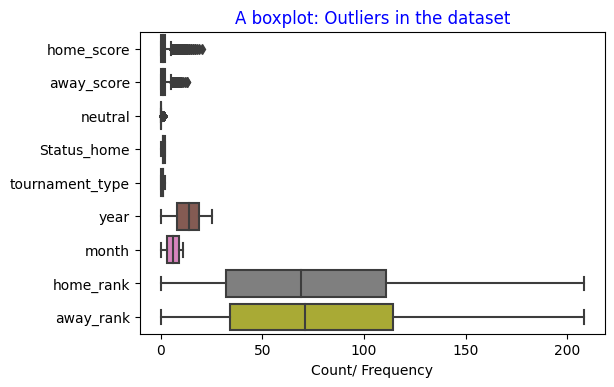

In [ ]:
# checking for outliers in our dataset
# Using boxplots
# Labeling the title of our chart
# Displaying chart 

plt.figure(dpi = 100)
ax = sns.boxplot(data = home_merged_encoded , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

The home and away score columns have a lot of outliers.

We will not remove them in this stage, to find out if they have an effect in our model.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

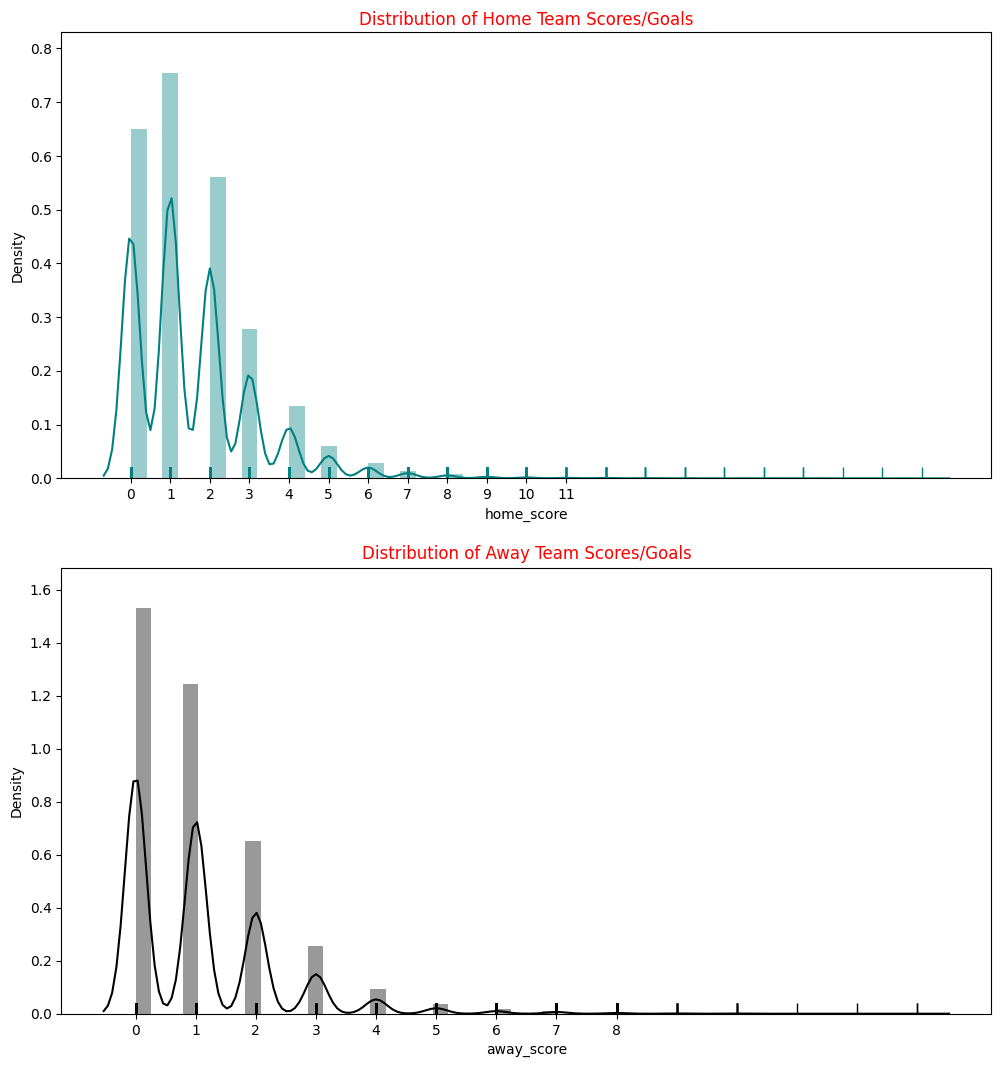

In [ ]:
# Creating histograms to show the distribution of the goals for home teams and away teams
# Specifying the figure size
# Using seaborn for plotting
# Specifying the bins in the x axis
# Labeling title


plt.figure(figsize=(12,13), dpi = 100)
plt.subplot(211)
sns.distplot(home_merged_encoded["home_score"],color="teal",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Scores/Goals",color='r')


plt.subplot(212)
sns.distplot(home_merged_encoded["away_score"],color="black",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Scores/Goals",color='r')
plt.show()
     

The histograms show that the home teams are highly likely to score at most one goal compared to the away team.

The charts also show that the goals scored in both home and away team is skewed to the right.

This means that there is a high probability of scoring more goals.

i.e. the outliers lie on the positive side.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


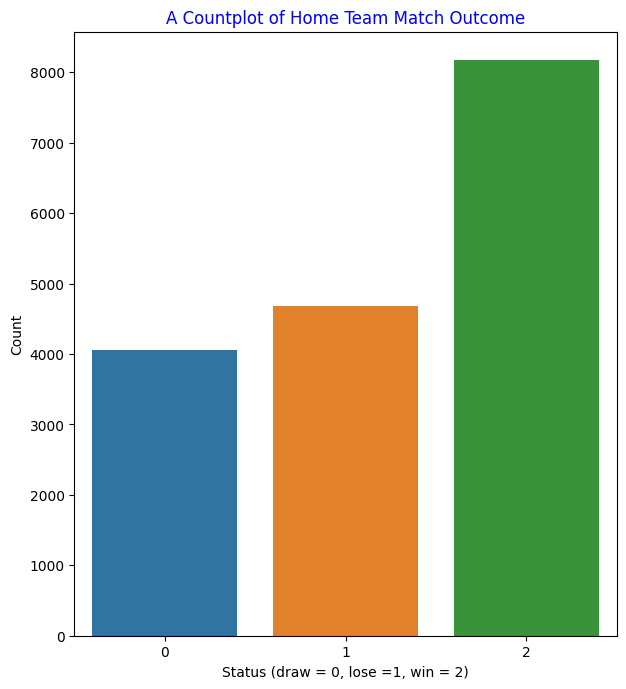

In [ ]:

# The Home team Match outcome(draw = 0, lose =1, win = 2)
# Using a countplot to visualize these results
# Using Seaborn
# Labeling the x and y axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(home_merged_encoded['Status_home'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Home Team Match Outcome', color = 'blue')
plt.show()
     

The bar chart above shows that in most cases the home team wins the match.

The home team is less likely to lose or draw in match.

#Multicollinearity

In [ ]:

 #check if the independent variables are collinear/ correlated to each other


# Getting the pearson correation coefficient for each of the variables

correlation = home_merged_encoded.corr()
correlation

,home_score,away_score,neutral,Status_home,tournament_type,year,month,home_rank,away_rank
home_score,1.000000,-0.164630,-0.042069,0.522603,0.050670,-0.038744,0.019612,-0.135755,0.320343
away_score,-0.164630,1.000000,0.100251,-0.241832,0.034421,-0.008379,0.018170,0.221477,-0.180634
neutral,-0.042069,0.100251,1.000000,-0.045219,0.126197,0.042915,-0.105011,0.037090,0.047561
Status_home,0.522603,-0.241832,-0.045219,1.000000,0.045661,-0.018907,0.011666,-0.115259,0.214090
tournament_type,0.050670,0.034421,0.126197,0.045661,1.000000,-0.020240,0.122963,0.069106,0.069350
year,-0.038744,-0.008379,0.042915,-0.018907,-0.020240,1.000000,-0.002137,0.104167,0.105806
month,0.019612,0.018170,-0.105011,0.011666,0.122963,-0.002137,1.000000,0.029475,0.030676
home_rank,-0.135755,0.221477,0.037090,-0.115259,0.069106,0.104167,0.029475,1.000000,0.469742
away_rank,0.320343,-0.180634,0.047561,0.214090,0.069350,0.105806,0.030676,0.469742,1.000000


The correlation matrix indicates that most variables are moderately or weakly correlated.

This is very beneficial when creating a model, as collinear variables reduce the power of the model to identify independent variables that are statistically significant.

We aim to create a model with the most significant variables.

We will use the correlation matrix to calculate the vif (Variance Inflation Factor).

The VIF will help in determining the variables that are collinear or highly correlated with each other.

In [ ]:

# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,home_score,away_score,neutral,Status_home,tournament_type,year,month,home_rank,away_rank
home_score,1.592510,-0.110101,0.061772,-0.674529,-0.040911,0.062184,-0.004278,0.437853,-0.597855
away_score,-0.110101,1.226628,-0.123045,0.203295,-0.024449,0.016520,-0.032151,-0.463336,0.437752
neutral,0.061772,-0.123045,1.053025,0.022388,-0.146076,-0.040441,0.130900,0.064467,-0.116780
Status_home,-0.674529,0.203295,0.022388,1.430779,-0.039943,0.002561,0.000657,0.069842,-0.084906
tournament_type,-0.040911,-0.024449,-0.146076,-0.039943,1.046618,0.033042,-0.139851,-0.062375,-0.018301
year,0.062184,0.016520,-0.040441,0.002561,0.033042,1.021305,-0.002988,-0.055046,-0.099964
month,-0.004278,-0.032151,0.130900,0.000657,-0.139851,-0.002988,1.032659,-0.004428,-0.030386
home_rank,0.437853,-0.463336,0.064467,0.069842,-0.062375,-0.055046,-0.004428,1.651042,-1.007254
away_rank,-0.597855,0.437752,-0.116780,-0.084906,-0.018301,-0.099964,-0.030386,-1.007254,1.780251


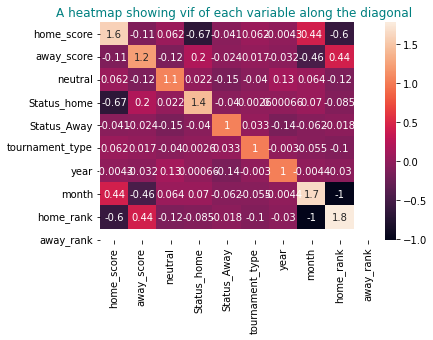

In [ ]:
# Plotting a heat map to show the vif visually.
# Using the seaborn library for visualization
# Labeling the title
# Displaying the chart

vif = np.linalg.inv(correlation.values)
sns.heatmap(vif, annot = True, xticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'], yticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'teal' )
plt.show()



VIFs Values greater than 5 indicate that the presence of multicollinearity.

If present we remove the variable with the greatest VIF value.

There are no correlated independent variables as all have VIF values are below 5, which is the threshold.

#Building a Model

##1. Polynomial Regression Model

In [ ]:
# Approach 1: Polynomial approach

# What to train given:

# Rank of home team
# Rank of away team
# Tournament type

# Model 1: Predict how many goals the home team scores

# Model 2: Predict how many goals the away team scores
     

In [ ]:

# Model 1
# Predict how many goals the home team scores given home rank
# Splitting the dataset into the features and target variable


X = home_merged_encoded['home_rank'].values.reshape(-1, 1)

y = home_merged_encoded['home_score'].values.reshape(-1, 1)
     

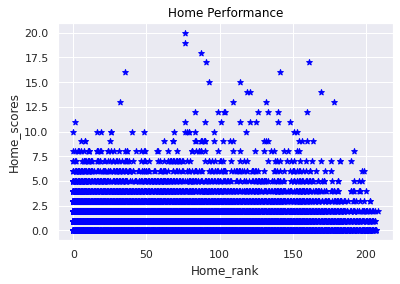

In [ ]:
# Visualizing the dependent vs independent variable by plotting a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '*' , color = 'blue') 
plt.title('Home Performance', color = 'black')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()


The chart above shows that there is no particular observable trend but,

There are more points on the lower side of the scatter plot.

Indicating in most cases the home team scores between 0 and 5 goals.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn import metrics


from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:

# Fit Linear Regression model to the dataset
# This is for comparing the linear regression model to the polynomial regression model)

reg_line = LinearRegression()
reg_line.fit(X, y)
     

LinearRegression()

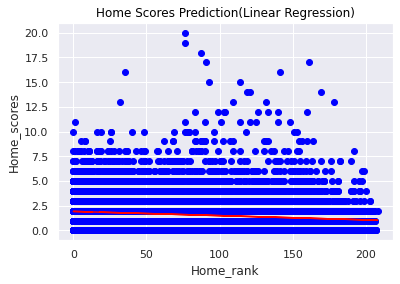

In [ ]:

# Visualize the Linear Regression results
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(X, y, color='blue')
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home Scores Prediction(Linear Regression)', color = 'black')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

The line of best fit does not pass through a majority of the points.

hence  underfitting is detected .

Therefore, the Linear regression model is not a good fit for this prediction.

We will fit a polynomial regression and evaluate the results.

In [ ]:
# Fitting the polynomial features to the X the independent variable
# We will start  with a polynomial regression of degree 2

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [ ]:

# Fitting a polynomial Regression to the dataset.

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
     

LinearRegression()

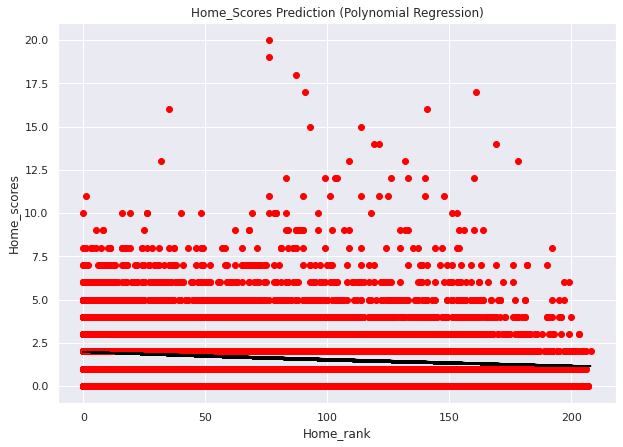

In [ ]:

# Visualizing the polynomial Regression results
# Specifying the chart size
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.figure(figsize = (10,7))
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(X_poly), color='black')
plt.title('Home_Scores Prediction (Polynomial Regression)')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()
     

The curve is not passing through as many points as expected  hence we can say that this graph is not fully optimized.

In [ ]:

# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [ ]:

# Evaluation our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))

RMSE:  1.5880578998328967
r2_score:  0.018694481014556508


In [ ]:

# Mean of the actual scores

np.mean(y) 
     

1.6026635099141757

In [ ]:
# Ten percent of the mean

1.6026635099141757 * 0.1

0.1602663509914176

Comparing the RMSE score = 1.59 with the 10% of actual scores mean = 0.16, it is above the actual scores mean.

This means that the model is not efficient to use for predicting the home team scores.

Hence we should try a model with more degrees to improve its efficiency.

In [ ]:

# Model 2: Predict how many goals the away team scores given the away team rank

#
X = home_merged_encoded['away_rank'].values.reshape(-1, 1)

y = home_merged_encoded['away_score'].values.reshape(-1, 1)

In [ ]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:

# Fitting the polynomial features to the X

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [ ]:

# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

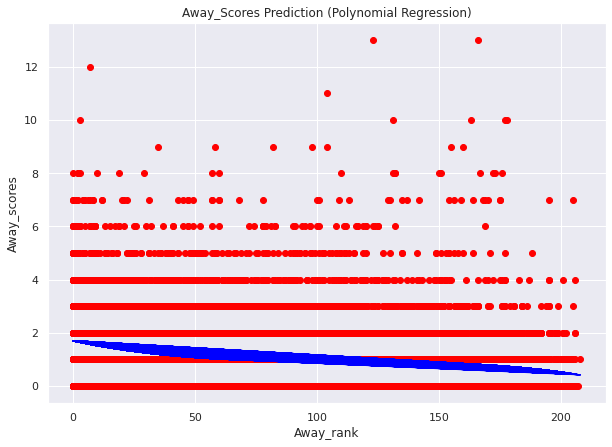

In [ ]:
 # Visualizing the polynomial Regression results using a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart
plt.figure(figsize = (10,7))
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Away_Scores Prediction (Polynomial Regression)')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()
     

The curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.
Underfitting detected.

In [ ]:

# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [ ]:

# Evaluating our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.2165654223317743
r2_score:  0.04008131109627655


In [ ]:
# Calculating the Mean of the actual scores 
# We will compare 10% of this mean with the RMSE

np.mean(y)
     

1.0687185557857355

Comparing the RMSE = 1.2 with 10% of the actual mean = 0.1

The RMSE is very high

Therefore this is not a good model to use for predicting the away score

##2.Logistic Regression Model

In [ ]:
# Viewing the first two observations before splittig our dataset

home_merged_encoded.head(2)
     

,home_score,away_score,neutral,Status_home,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,1,0,7,69,4


In [ ]:

# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = home_merged_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [ ]:

# Evalauting the model

# Getting the accuracy score of our model

print(accuracy_score(y_test, y_pred))

0.5839005622965374


our score is below 50% thus the model may not be well optimized

##  Cross-Validation (Logistic Regression Model)

In [ ]:
# Using KFolds
import warnings
warnings.filterwarnings('ignore')
# Splitting our dataset
# independet variables as X
# dependent variable as y

X = home_merged_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1).values
y = home_merged_encoded.Status_home.values

# specifying the number of folds

folds = KFold(n_splits = 10)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
  LogReg = LogisticRegression()  
  LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
  y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  # printing each model RMSE
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  


Training model 1
Model 1 Root Mean Squared Error: 0.890448992522325

Training model 2
Model 2 Root Mean Squared Error: 0.9348606832258056

Training model 3
Model 3 Root Mean Squared Error: 0.9370733743286807

Training model 4
Model 4 Root Mean Squared Error: 0.9601528477926108

Training model 5
Model 5 Root Mean Squared Error: 0.9275532489220222

Training model 6
Model 6 Root Mean Squared Error: 0.9275086794759693

Training model 7
Model 7 Root Mean Squared Error: 0.9865885748303547

Training model 8
Model 8 Root Mean Squared Error: 0.9542525802818357

Training model 9
Model 9 Root Mean Squared Error: 0.9717745452139983

Training model 10
Model 10 Root Mean Squared Error: 0.9964412698513031


In [ ]:

# Printing the mean and the standard deviation of the RMSES in all the 10 models

print(np.mean(RMSES))
print(np.std(RMSES))
 

0.9486654796444907
0.030042198109440102


##Heteroskedasticity

In [ ]:
# First: splitting our dataset 
# Into the feature set and the target variable

X = home_merged_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting a Logistic model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

0.41580349215744306

The mean is 0.41 indicating that we tend to be fairly correct, although slightly over estimating the home team perfomance by, on average, 41.5%

##Residual Plots

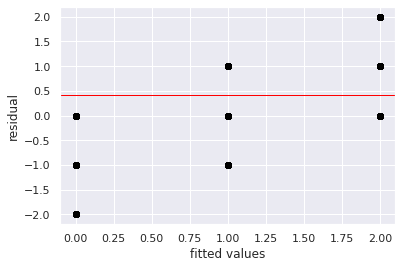

In [ ]:

# Visualizing the residuals using a scatter plot 
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()
     

From the plot we can see that there is a constant variance.

Hence the homoscedasticity assumption is not violated.

###Barlett's test

In [ ]:
import scipy as sp

# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

6.680655938534147e-211
The variances are Homogeneous!


#Challenging the solution

In [ ]:
from sklearn.model_selection import GridSearchCV# Using Hyperparameter Tuning

# Splitting the dataset into independent variables and target variable

X = home_merged_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home
# Creating the logistic Regression

logistic = LogisticRegression()
# Creating regularization penalty space    
#  penalty term is a constraint region or a budget 
# Regulization helps to select the preferred model complexity 
# so that the model is better at predicting

# L1: uses absolute values in the penalty function
# L2: minimizes the sum of errors

penalty = ['l1', 'l2']

# Creating regularization hyperparameter space

C = np.logspace(0, 4, 10)

# Creating hyperparameters options

hyperparameters = dict(C=C, penalty = penalty)

# Creating grid search using 10-fold cross validation

clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

# Fitting grid search
best_model = clf.fit(X, y)

# Finding out the best hyperparameters available to tune the Logistic Regression model
best_model

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:

# Viewing best hyperparameters

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
best_model.best_score_
     

Best Penalty: l2
Best C: 1291.5496650148827


0.5783351375590752

In [ ]:
# Predicting target vector

best_model.predict(X)
     

array([2, 1, 2, ..., 1, 1, 1])

In [ ]:

# Using XGBOOST 

# Tuning the parameters

import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X, y)

predictions = gbm.predict(X_test)

print(accuracy_score(y_test, predictions))


0.5945546019532406


##Conclusion
. 1.Predicting whether home team wins, loses or draws in a match

The best accuracy score using two hyperparameters is 58%
Using XGboost algorithm the accuracy score was 59%
Therefore, another algorithm can be considered to improve the accuracy score or more hyperparameters should be tuned
*****
2. Predicting the rank of a team

None of the  regularized regression models is a good fit to predict the rank; they all have RMSE scores greater than the mean of the actual.
Since this is also more of a classification problem, using regressions is not the best approach though this project was restrictive.